In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import loader
import plot
import helpers
import importlib
importlib.reload(loader)
importlib.reload(plot)
importlib.reload(helpers)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import ShuffleSplit, cross_val_score, train_test_split, StratifiedKFold, learning_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import RMSprop
from sklearn.ensemble import AdaBoostClassifier

In [3]:
data = loader.load_adult_data()
data.shape

(32561, 109)

In [4]:
data.head()

,age,fnlwgt,education-num,capital gain,capital loss,hours per week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia,target
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.groupby(by='target').count()

,age,fnlwgt,education-num,capital gain,capital loss,hours per week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia
target,,,,,,,,,,,,,,,,,,,,,
0,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,...,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720
1,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,...,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841


In [6]:
data.head()

,age,fnlwgt,education-num,capital gain,capital loss,hours per week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia,target
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
features = [col for col in data.columns if col != "target"]
X = data[features]
y = data["target"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [85]:
# No param tuning base classifier score
basic = DecisionTreeClassifier()
basic.fit(X_train, y_train)
basic.score(X_test, y_test)

0.8148223973794656

In [108]:
# Decision Tree
basic_param_grid=dict(criterion=['gini'])
clf = DecisionTreeClassifier()
basic_grid = GridSearchCV(estimator=clf, param_grid=basic_param_grid, return_train_score=True)
basic_grid_result = basic_grid.fit(X_train, y_train)
basic_res = basic_grid_result.cv_results_
basic_res_df = helpers.scikit_cv_result_to_df(basic_res)
basic_res_df.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
criterion,,,,,,,,,
gini,0.287317,0.025278,0.006868,0.001203,0.812565,0.00602,1,1.0,0.0


In [111]:
basic_res_df[helpers.get_useful_cv_columns()]

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score
criterion,,,,
gini,0.287317,0.006868,0.812565,1.0


In [90]:
basic.tree_.max_depth

45

In [99]:
basic.get_n_leaves()

3224

In [102]:
basic.tree_.node_count

6447

In [117]:
basic = DecisionTreeClassifier()
path = basic.cost_complexity_pruning_path(X_train, y_train)

In [123]:
path.ccp_alphas

array([0.00000000e+00, 1.75148472e-05, 2.07187707e-05, ...,
       1.61755448e-02, 3.00664776e-02, 7.21877997e-02])

In [141]:
alphas = [0, .001, 0.0025, .01, 0.2]

In [142]:
criterion = ['gini', 'entropy']

param_grid = dict(ccp_alpha=alphas, criterion=criterion)
grid = GridSearchCV(estimator=basic, param_grid=param_grid, return_train_score=True)
grid_result = grid.fit(X_train, y_train)

In [143]:
res = grid_result.cv_results_
res

{'mean_fit_time': array([0.42621102, 0.42239771, 0.44176097, 0.43213758, 0.45022717,
        0.44461708, 0.45929284, 0.45293303, 0.46362543, 0.457511  ]),
 'std_fit_time': array([0.0194592 , 0.00690799, 0.01752368, 0.00555716, 0.02662055,
        0.00659515, 0.01546183, 0.00544805, 0.01321892, 0.0074585 ]),
 'mean_score_time': array([0.00987644, 0.01062613, 0.00954428, 0.0090342 , 0.00916557,
        0.00930915, 0.00957384, 0.00952249, 0.00961699, 0.01010375]),
 'std_score_time': array([0.00086245, 0.00119377, 0.00093954, 0.00117645, 0.00031161,
        0.00068158, 0.00091927, 0.00138841, 0.00035302, 0.00082934]),
 'param_ccp_alpha': masked_array(data=[0, 0, 0.001, 0.001, 0.0025, 0.0025, 0.01, 0.01, 0.2,
                    0.2],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_criterion': masked_array(data=['gini', 'entropy', 'gini', 'entropy', 'gini',
            

In [144]:
res_df = helpers.scikit_cv_result_to_df(res)
res_df.sort_values(by='rank_test_score')[helpers.get_useful_cv_columns()]

mean_fit_time  mean_score_time  mean_test_score  \
ccp_alpha criterion                                                    
0.0010    entropy         0.432138         0.009034         0.854116   
          gini            0.441761         0.009544         0.852185   
0.0025    entropy         0.444617         0.009309         0.852009   
          gini            0.450227         0.009166         0.847885   
0.0100    gini            0.459293         0.009574         0.844902   
          entropy         0.452933         0.009522         0.844902   
0.0000    entropy         0.422398         0.010626         0.813575   
          gini            0.426211         0.009876         0.811600   
0.2000    gini            0.463625         0.009617         0.759170   
          entropy         0.457511         0.010104         0.759170   

                     mean_train_score  
ccp_alpha criterion                    
0.0010    entropy            0.858909  
          gini               0.855168  
0.0025    entropy            0.854115  
          gini               0.848927  
0.0100    gini               0.845077  
          entropy            0.845077  
0.0000    entropy            1.000000  
          gini               1.000000  
0.2000    gini               0.759170  
          entropy            0.759170

In [145]:
gini = res_df.xs('gini', level='criterion')
entropy = res_df.xs('entropy', level='criterion')

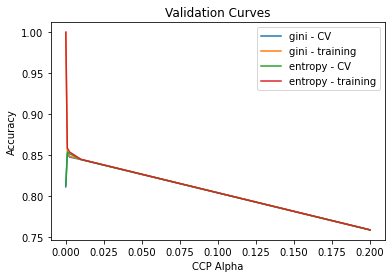

In [160]:
plt.plot(alphas, gini['mean_test_score'], label='gini - CV')
plt.plot(alphas, gini['mean_train_score'],  label='gini - training')
plt.plot(alphas, entropy['mean_test_score'], label='entropy - CV')
plt.plot(alphas, entropy['mean_train_score'], label='entropy - training')
plt.legend(loc='best')
plt.title('Validation Curves')
plt.ylabel('Accuracy')
plt.xlabel('CCP Alpha')
plt.show()

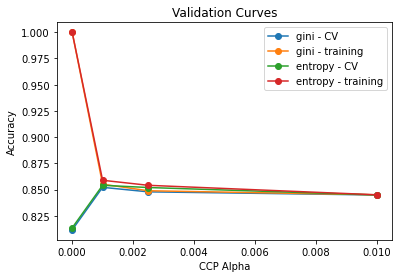

In [161]:
less_alphas = [0, .001, 0.0025, .01]
gini['mean_test_score'].iloc[0:4]
plt.plot(less_alphas, gini['mean_test_score'].iloc[0:4], marker='o', label='gini - CV')
plt.plot(less_alphas, gini['mean_train_score'].iloc[0:4], marker='o',  label='gini - training')
plt.plot(less_alphas, entropy['mean_test_score'].iloc[0:4], marker='o', label='entropy - CV')
plt.plot(less_alphas, entropy['mean_train_score'].iloc[0:4], marker='o', label='entropy - training')
plt.legend(loc='best')
plt.title('Validation Curves')
plt.ylabel('Accuracy')
plt.xlabel('CCP Alpha')
plt.show()

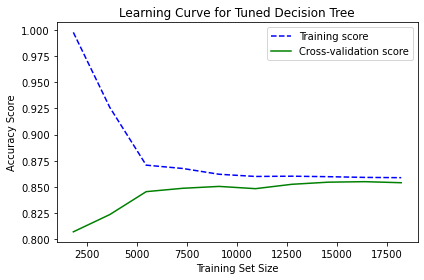

In [9]:
best_model = DecisionTreeClassifier(criterion='entropy', ccp_alpha=.001)
plot.plot_learning_curve(best_model, X_train, y_train, title='Learning Curve for Tuned Decision Tree')

In [169]:
best_model.fit(X_train, y_train)
y_test_pred = best_model.predict(X_test)
print(f"Final accuracy achieved: {accuracy_score(y_test, y_test_pred)}")

Final accuracy achieved: 0.8499334629951889


In [166]:
best_model.get_n_leaves()

25

In [167]:
best_model.tree_.node_count

49

In [168]:
best_model.tree_.max_depth

10